In [1]:
import os
os.chdir("/home/dat/Workspace/sd-maskrcnn")

import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.color
import tools.train
from autolab_core import YamlConfig
from mrcnn import model as modellib
from sd_maskrcnn.config import MaskConfig
from tools.resize import scale_to_square
%matplotlib inline

Unable to import DataStreamSyncer and Recorder! Likely due to missing multiprocess


Using TensorFlow backend.


In [2]:
mode = "GBD"
config = YamlConfig("cfg/train.yaml")
config["dataset"]["path"] = "../datasets/wisdom/wisdom-real/high-res/"
config["dataset"]["images"] = f"{mode}_ims"
config["model"]["settings"]["name"] = f"sdmaskrcnn_finetune_{mode}"
config["save_conf_name"] = f"sdmaskrcnn_finetune_{mode}_00.yaml"

In [3]:
tools.train.train(config)


Configurations:
BACKBONE                       resnet35
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     2
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 2
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE              

/home/dat/.virtualenvs/sdmaskrcnn/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/home/dat/.virtualenvs/sdmaskrcnn/lib/python3.6/site-packages/keras/engine/training_generator.py:47: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/10
150/150 [==============================] - 336s 2s/step - loss: 1.2063 - rpn_class_loss: 0.0261 - rpn_bbox_loss: 0.2638 - mrcnn_class_loss: 0.2302 - mrcnn_bbox_loss: 0.3506 - mrcnn_mask_loss: 0.3356 - val_loss: 1.0320 - val_rpn_class_loss: 0.0229 - val_rpn_bbox_loss: 0.3065 - val_mrcnn_class_loss: 0.1770 - val_mrcnn_bbox_loss: 0.3096 - val_mrcnn_mask_loss: 0.2159
Epoch 2/10
150/150 [==============================] - 138s 919ms/step - loss: 0.8881 - rpn_class_loss: 0.0148 - rpn_bbox_loss: 0.1914 - mrcnn_class_loss: 0.1801 - mrcnn_bbox_loss: 0.2605 - mrcnn_mask_loss: 0.2413 - val_loss: 1.1704 - val_rpn_class_loss: 0.0219 - val_rpn_bbox_loss: 0.3075 - val_mrcnn_class_loss: 0.2209 - val_mrcnn_bbox_loss: 0.3461 - val_mrcnn_mask_loss: 0.2740
Epoch 3/10
150/150 [==============================] - 130s 869ms/step - loss: 0.8387 - rpn_class_loss: 0.0132 - rpn_bbox_loss: 0.1852 - mrcnn_class_loss: 0.1685 - mrcnn_bbox_loss: 0.2347 - mrcnn_mask_loss: 0.2370 - val_loss: 1.3693 - val_rpn_c

In [4]:
config = YamlConfig("cfg/benchmark.yaml")
config["model"]["path"] = "models/sdmaskrcnn_finetune_gbd20181220T1559/mask_rcnn_sdmaskrcnn_finetune_gbd_0010.h5"

inference_config = MaskConfig(config["model"]["settings"])
inference_config.GPU_COUNT = 1
inference_config.IMAGES_PER_GPU = 1

model_dir, _ = os.path.split(config['model']['path'])
model = modellib.MaskRCNN(mode=config['model']['mode'], config=inference_config, model_dir=model_dir)
print("Loading weights from ", config['model']['path'])
model.load_weights(config['model']['path'], by_name=True)

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


Loading weights from  models/sdmaskrcnn_finetune_gbd20181220T1559/mask_rcnn_sdmaskrcnn_finetune_gbd_0010.h5
Re-starting from epoch 10


{'rois': array([[288, 277, 343, 332],
       [179, 177, 281, 275],
       [187, 286, 252, 367],
       [254, 248, 301, 296],
       [259, 322, 332, 378],
       [236, 277, 262, 338],
       [209, 220, 238, 252]], dtype=int32), 'scores': array([0.99814284, 0.99360234, 0.9928011 , 0.98815405, 0.9874156 ,
       0.97953427, 0.85137695], dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1, 1], dtype=int32)}
(512, 512, 7)


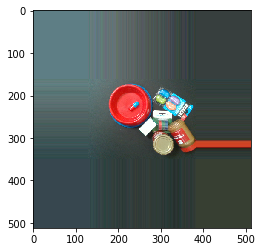

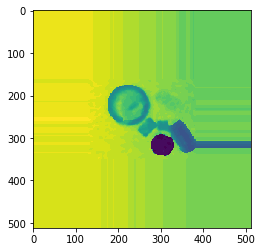

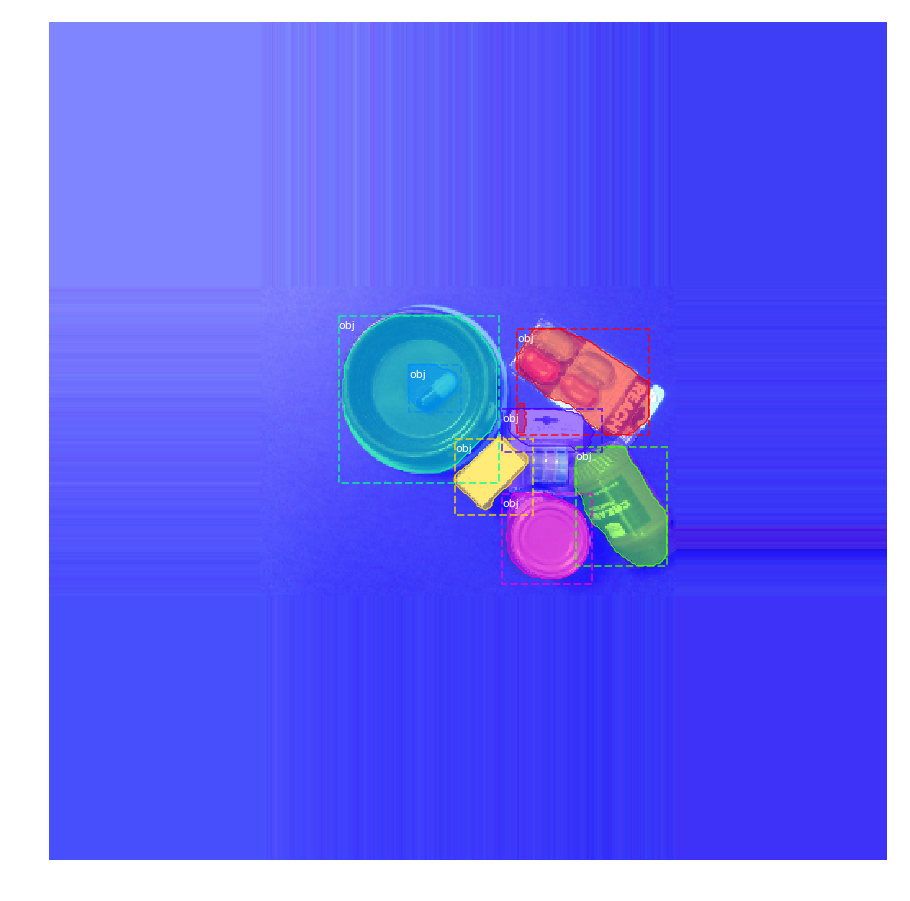

{'rois': array([[194, 228, 237, 313],
       [299, 222, 350, 269],
       [286, 285, 348, 341],
       [244, 249, 285, 331],
       [221, 342, 247, 361],
       [249, 303, 287, 343]], dtype=int32), 'scores': array([0.99402964, 0.99309146, 0.991614  , 0.9904428 , 0.99031734,
       0.9169216 ], dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1], dtype=int32)}
(512, 512, 6)


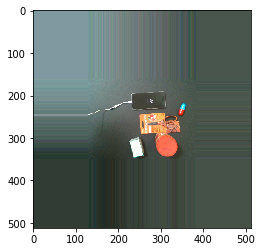

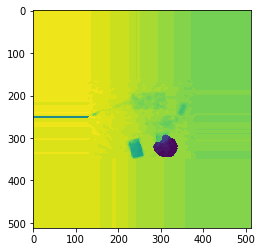

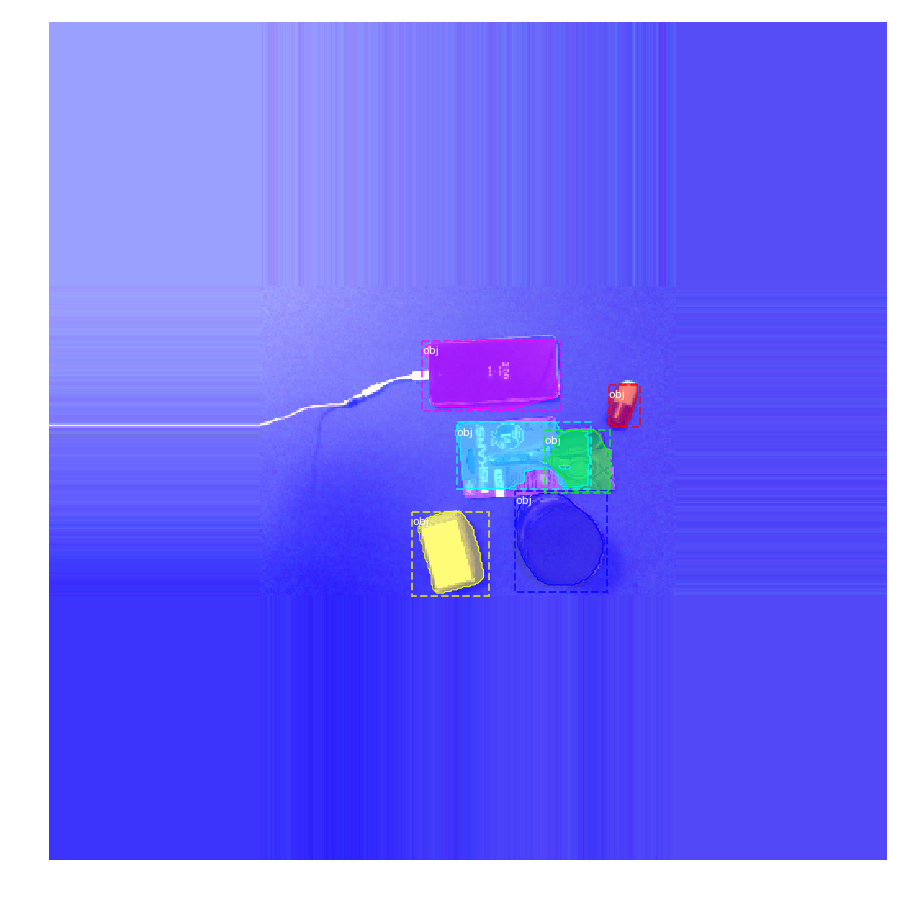

{'rois': array([[208, 288, 247, 329],
       [205, 198, 258, 315],
       [244, 189, 275, 255],
       [306, 267, 330, 293],
       [269, 349, 304, 512],
       [298, 266, 337, 317]], dtype=int32), 'scores': array([0.9944336 , 0.9796062 , 0.978529  , 0.97432965, 0.8859591 ,
       0.74695915], dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1], dtype=int32)}
(512, 512, 6)


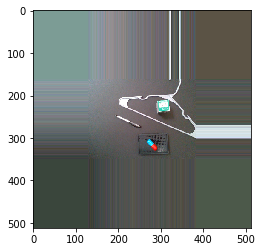

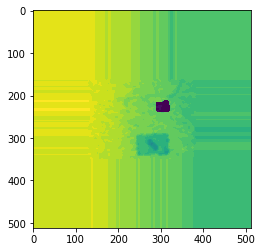

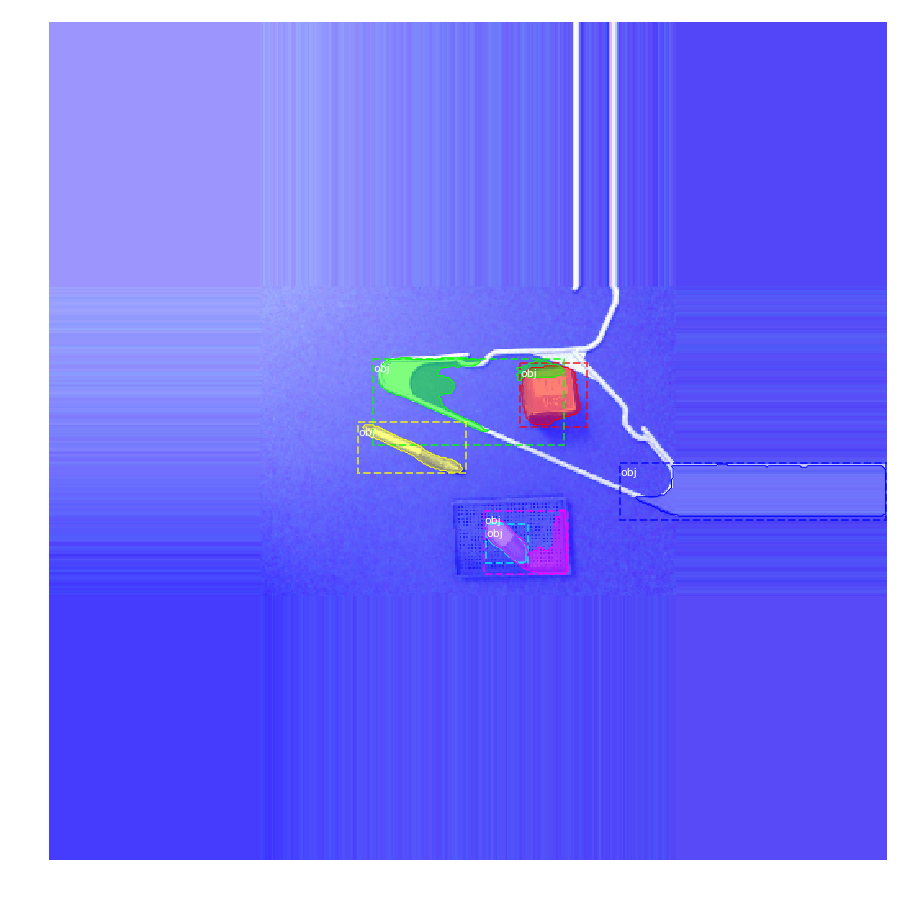

{'rois': array([[216, 277, 313, 341],
       [261, 199, 316, 276],
       [207, 229, 256, 276],
       [222, 335, 245, 362]], dtype=int32), 'scores': array([0.9977375 , 0.99621516, 0.9946838 , 0.98214597], dtype=float32), 'class_ids': array([1, 1, 1, 1], dtype=int32)}
(512, 512, 4)


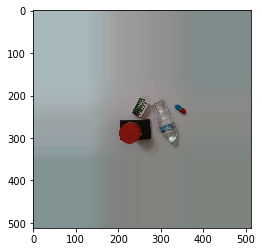

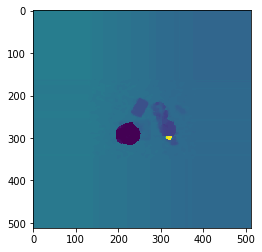

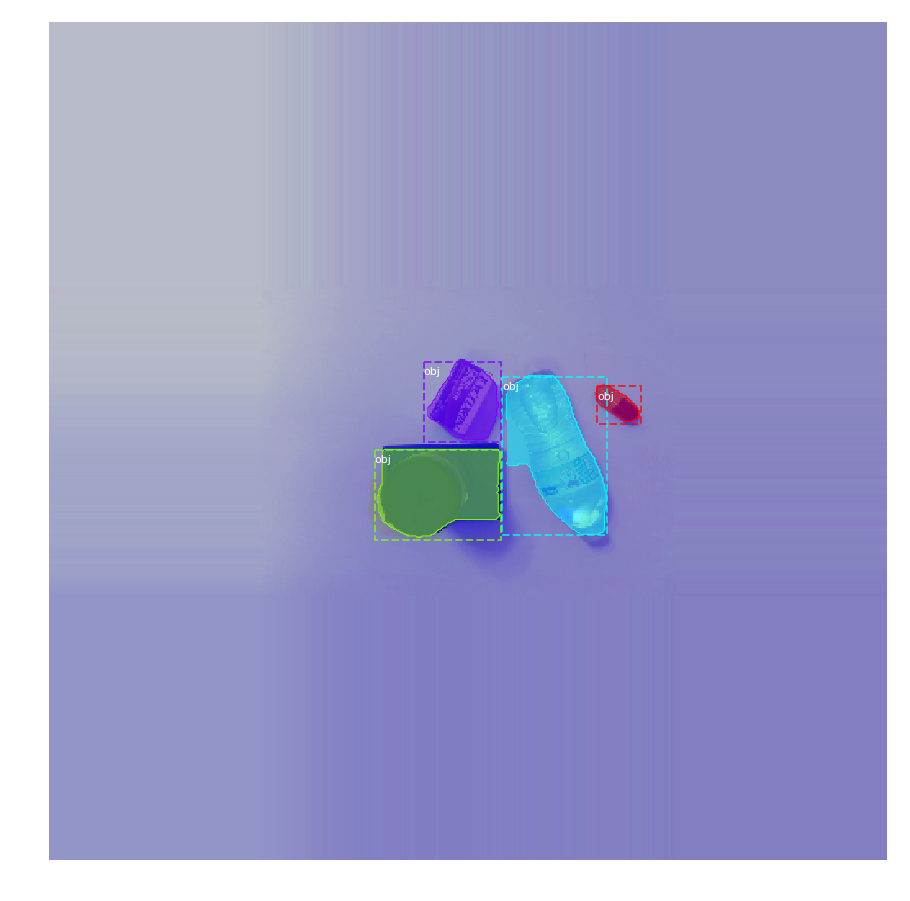

{'rois': array([[289, 328, 322, 374],
       [221, 206, 291, 301],
       [231, 331, 257, 379],
       [258, 256, 320, 308],
       [262, 334, 291, 373],
       [249, 210, 290, 264]], dtype=int32), 'scores': array([0.9971398 , 0.9947084 , 0.9912845 , 0.98920244, 0.9845026 ,
       0.9485984 ], dtype=float32), 'class_ids': array([1, 1, 1, 1, 1, 1], dtype=int32)}
(512, 512, 6)


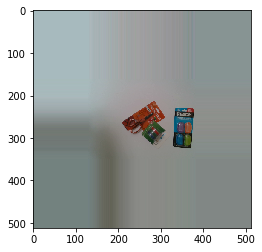

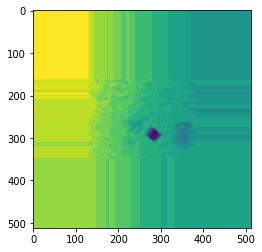

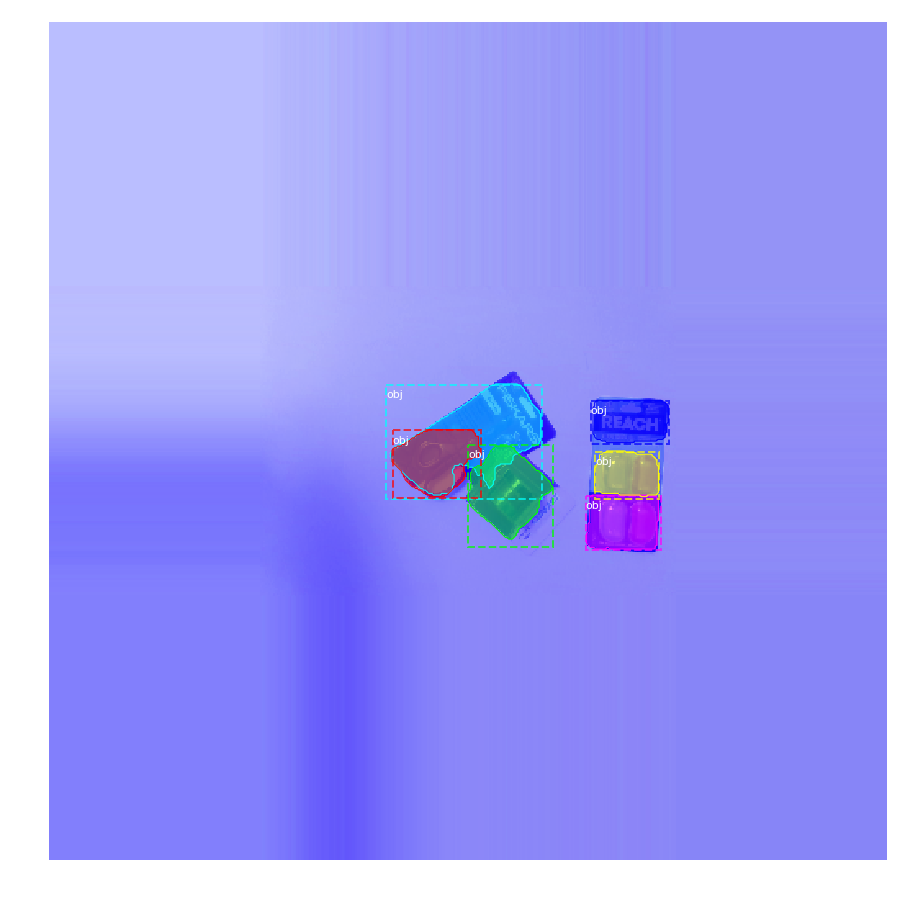

{'rois': array([[214, 344, 247, 378],
       [215, 238, 324, 341]], dtype=int32), 'scores': array([0.99765813, 0.99578047], dtype=float32), 'class_ids': array([1, 1], dtype=int32)}
(512, 512, 2)


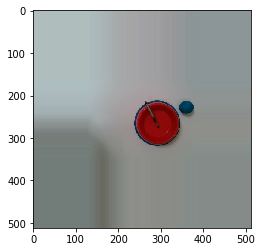

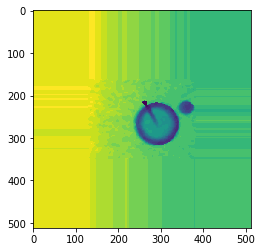

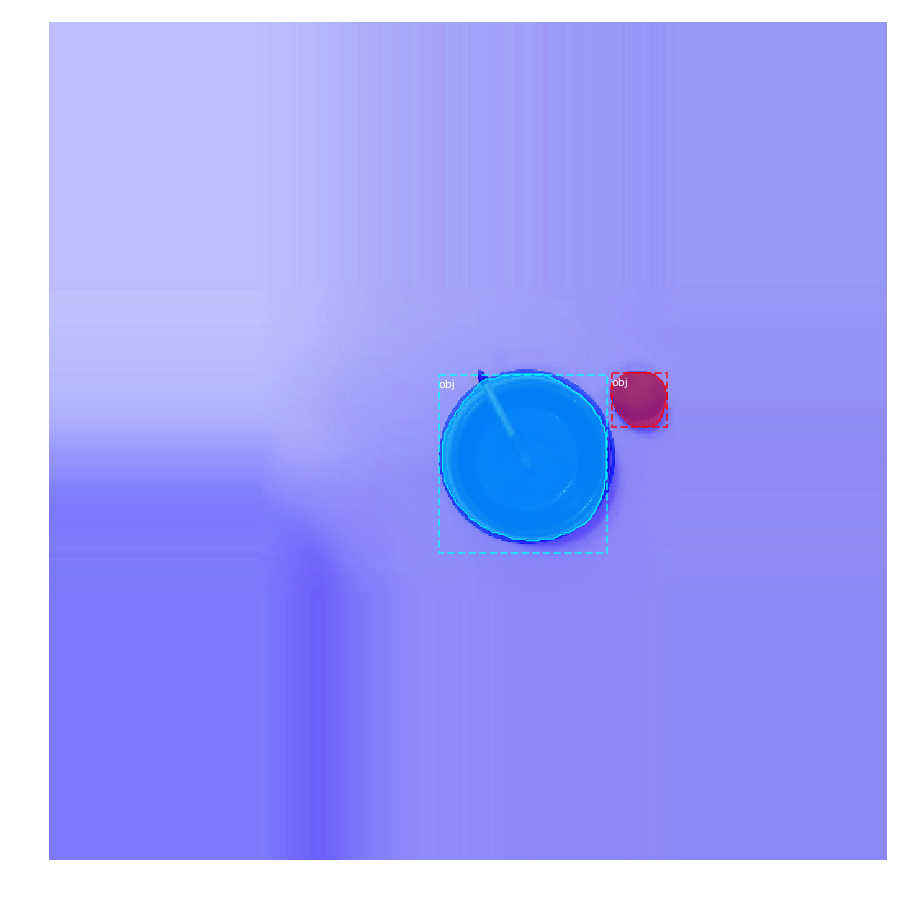

{'rois': array([[253, 257, 278, 307],
       [169, 262, 187, 292]], dtype=int32), 'scores': array([0.99206805, 0.78475404], dtype=float32), 'class_ids': array([1, 1], dtype=int32)}
(512, 512, 2)


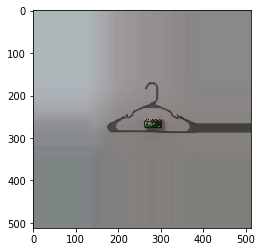

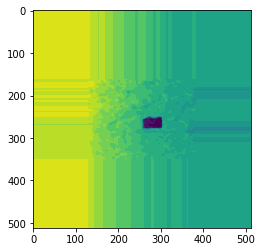

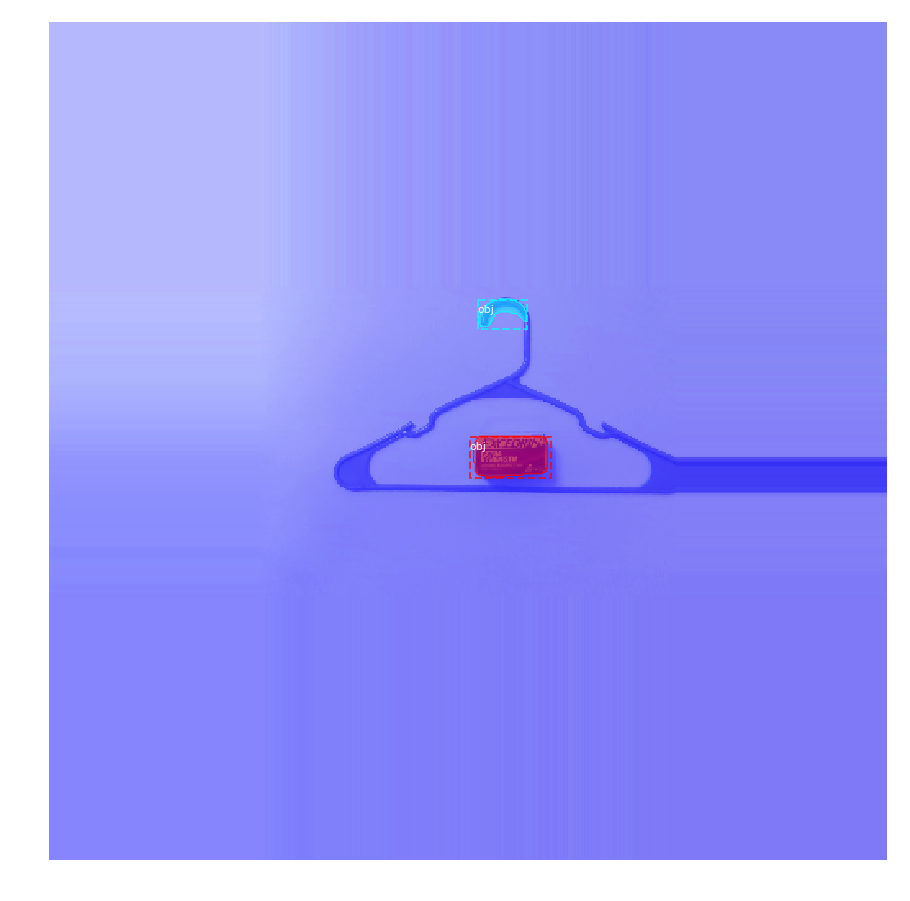

{'rois': array([[207, 265, 258, 313],
       [259, 317, 296, 366]], dtype=int32), 'scores': array([0.99053603, 0.98565245], dtype=float32), 'class_ids': array([1, 1], dtype=int32)}
(512, 512, 2)


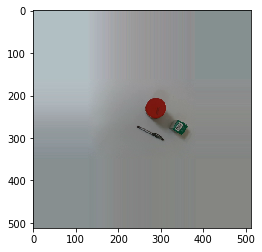

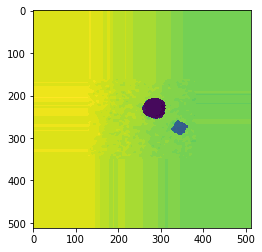

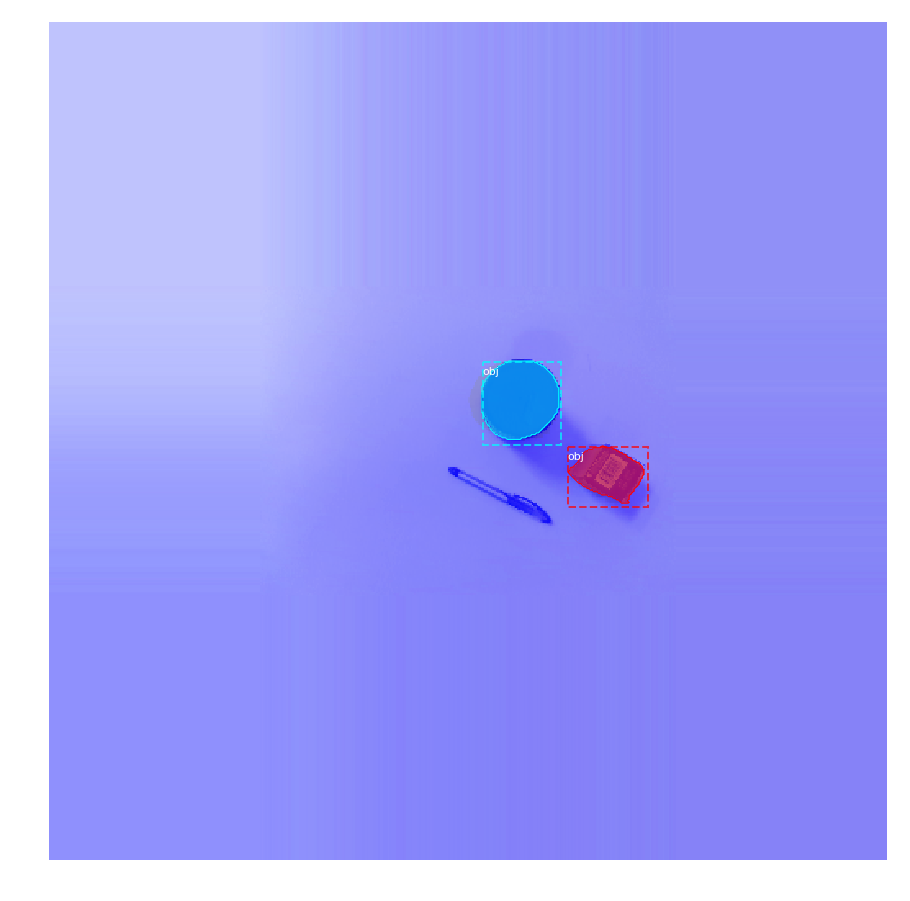

In [7]:
from mrcnn import visualize
COLOR_DIR = "data/color"
DEPTH_DIR = "data/depth"


def detect(model, image):
    results = model.detect([image], verbose=0)
    r = results[0]
    
    # Save info
    r_info = {
        'rois': r['rois'],
        'scores': r['scores'],
        'class_ids': r['class_ids']
    }
    print(r_info)
    print(r["masks"].shape)
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], ['bg', 'obj'])
    plt.savefig("masked.png")
    plt.show()


for fname in sorted(os.listdir(COLOR_DIR)):
    color = scale_to_square(cv2.imread(os.path.join(COLOR_DIR, fname)))[..., ::-1]
    depth = scale_to_square(cv2.imread(os.path.join(DEPTH_DIR, fname)))[..., 0]
    
    h, w, _ = color.shape
    depth = cv2.resize(depth, (int(w / 2), int(h / 2)), interpolation=cv2.INTER_NEAREST)
    color = cv2.resize(color, (int(w / 2), int(h / 2)), interpolation=cv2.INTER_NEAREST)

    v_pad, h_pad = (512 - color.shape[0]) // 2, (512 - color.shape[1]) // 2
    color = cv2.copyMakeBorder(color, v_pad, v_pad, h_pad, h_pad, cv2.BORDER_REPLICATE)
    depth = cv2.copyMakeBorder(depth, v_pad, v_pad, h_pad, h_pad, cv2.BORDER_REPLICATE)
    gray = (skimage.color.rgb2gray(color) * 255).astype(np.uint8)
    
    plt.figure()
    plt.imshow(color)
    plt.figure()
    plt.imshow(depth)
    
    inp_img = np.zeros((512, 512, 3))
    inp_img[..., 0] = color[..., 1]
    inp_img[..., 1] = color[..., 2]
    inp_img[..., 2] = depth
    detect(model, inp_img)